#              **Titanic Dataset Analysis**

### Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset

In [7]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle missing data

In [17]:
df.drop(columns='Cabin',inplace= True)

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [25]:
df.ffill(inplace=True)

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA & VISUALIZATION

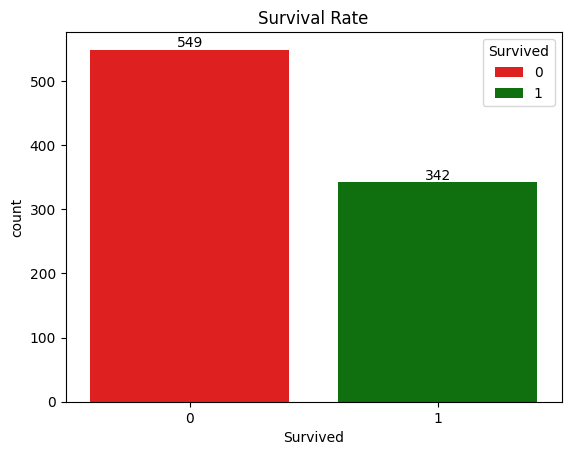

In [91]:
ax=sns.countplot(data=df,x="Survived",hue='Survived',palette=['red','green'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Rate')
plt.show()

In [39]:
Total_survived=df['Survived'].sum()
print(Total_survived)

342


In [40]:
total_passengers=df.shape[0]
print(total_passengers)

891


### Insight:
  * Total passenger = 891
  * Survived = 342
  * Died = 891-342= 549

In [41]:
Survival_Rate = round((Total_survived/total_passengers)*100,2)
print(Survival_Rate)

38.38


In [47]:
Survival_rate_by_sex = round(df.groupby('Sex')['Survived'].mean()*100,2)
print(Survival_rate_by_sex)

Sex
female    74.20
male      18.89
Name: Survived, dtype: float64


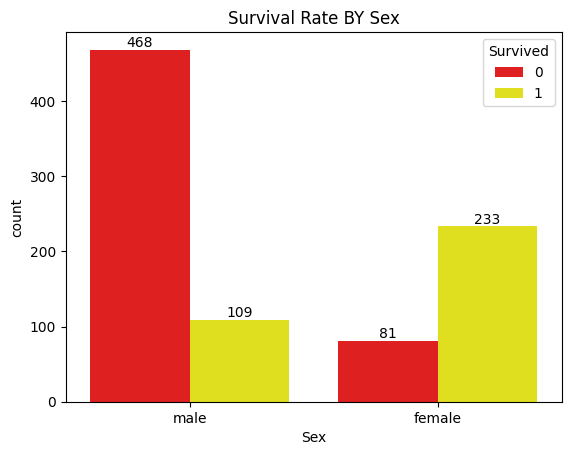

In [85]:
ax=sns.countplot(df,x='Sex',hue='Survived',palette=['Red','yellow'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Rate BY Sex')
plt.show()

### Insight:
  * Survival rate of female was high (233 females survived)


In [53]:
survival_rate_by_Pclass = round(df.groupby('Pclass')['Survived'].mean()*100,2)
print(survival_rate_by_Pclass)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


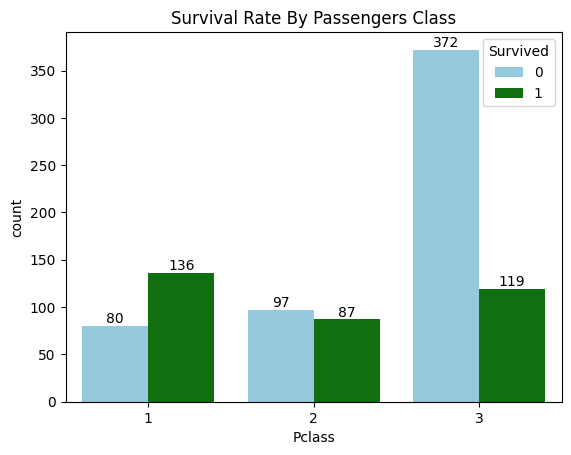

In [87]:
ax = sns.countplot(df,x='Pclass',hue='Survived',palette=['Skyblue','Green'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Rate By Passengers Class')
plt.show()

### Insight:
  * Survival Rate was highest in 1st class passengers while it was lowest in 3rd class passengers

In [65]:
#Divide Passengers into categories on basis of age

bins = [0, 12, 18, 35, 60, 100]  
labels = ['Kid', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# View grouped data
print(df[['Age', 'age_group']].head(10))


    Age    age_group
0  22.0  Young Adult
1  38.0        Adult
2  26.0  Young Adult
3  35.0  Young Adult
4  35.0  Young Adult
5  35.0  Young Adult
6  54.0        Adult
7   2.0          Kid
8  27.0  Young Adult
9  14.0         Teen


In [66]:
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

age_group
Kid             92
Teen            81
Young Adult    442
Adult          252
Senior          24
Name: count, dtype: int64


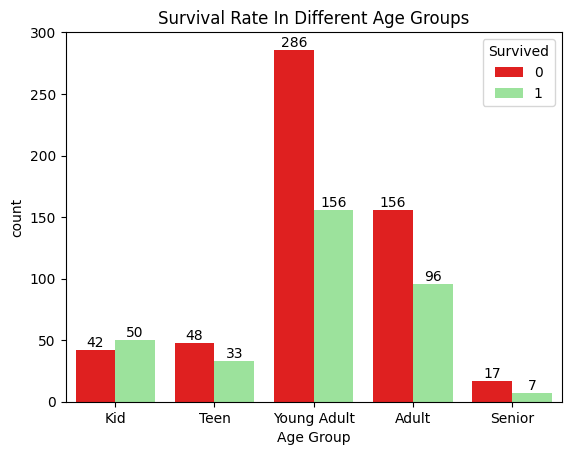

In [88]:
ax = sns.countplot(df,x='age_group',hue='Survived',palette=['red','lightgreen'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Rate In Different Age Groups')
plt.xlabel('Age Group')
plt.show()

### Insight:
  * Highest number of deaths were recorded in Age group of Young Adults ranging from 18-35

In [74]:
SR_from_different_ports=round(df.groupby('Embarked')['Survived'].mean()*100,2)
print(SR_from_different_ports)



Embarked
C    55.62
Q    39.74
S    33.70
Name: Survived, dtype: float64


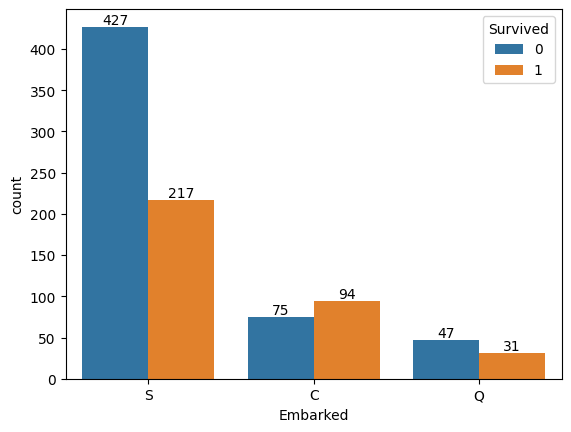

In [76]:
ax = sns.countplot(df,x='Embarked',hue='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Insight:
  * Highest deaths recorded in Passengers boarded from Southampton port in England

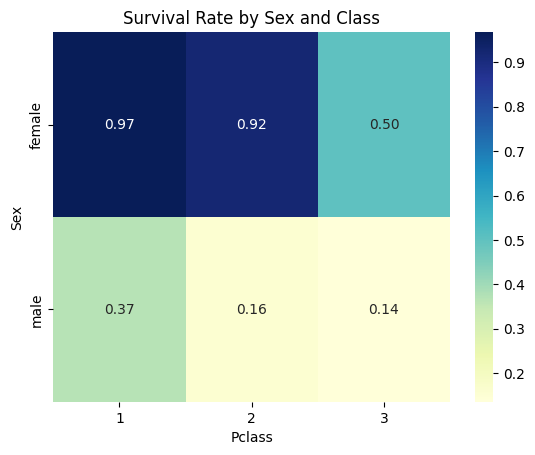

In [79]:
# Create pivot table
pivot = df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')

# Plot heatmap
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Survival Rate by Sex and Class')
plt.show()


### Insight:
  * HeatMap shows Correlation between Sex and Class
  * Shows a highest positive relation between females and 1st class it means females who were in 1st class survived more